<a href="https://colab.research.google.com/github/AkhmadRamadani/PCVK_GENAP_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIODATA

> **Akhmad Ramadani**

> TI-3B 

> 2041720002

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

In [5]:
def show_image_histogram(img):
    height, width, depth = img.shape
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    red = np.zeros((256,))
    green = np.zeros((256,))
    blue = np.zeros((256,))
    for y in range(0, height):
        for x in range(0, width):
            r, g, b = img[y, x]
            red[r] += 1
            green[g] += 1
            blue[b] += 1

    plt.figure(figsize=(25,5))
    plt.subplot(1,3,1)
    plt.bar(range(256), red, color='r', width=1)
    plt.title('Red channel')

    plt.subplot(1,3,2)
    plt.bar(range(256), green, color='g', width=1)
    plt.title('Green channel')

    plt.subplot(1,3,3)
    plt.bar(range(256), blue, color='b', width=1)
    plt.title('Blue channel')

    plt.show()


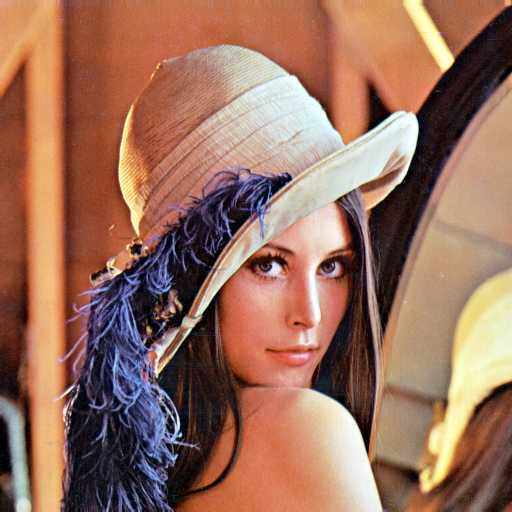

In [6]:
img1 = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/lena.jpg')
cv2_imshow(img1)

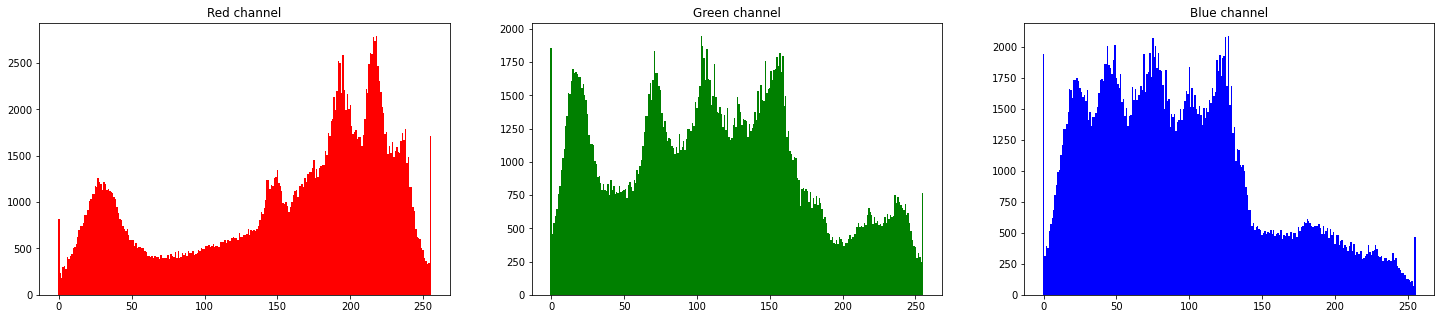

In [7]:
show_image_histogram(img1)

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

> Iya, muncul output yang sama.

In [61]:
def show_image_histogram_numpy(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    red, _ = np.histogram(img[:,:,0], bins=256, range=(0, 255))
    green, _ = np.histogram(img[:,:,1], bins=256, range=(0, 255))
    blue, _ = np.histogram(img[:,:,2], bins=256, range=(0, 255))

    if(red.all() == green.all()):
      plt.figure(figsize=(25,5))
      plt.subplot(1,3,1)
      plt.bar(range(256), red, color='gray', width=1)
      plt.title('Gray channel')
      plt.show()
    else:
      plt.figure(figsize=(25,5))
      plt.subplot(1,3,1)
      plt.bar(range(256), red, color='r', width=1)
      plt.title('Red channel')

      plt.subplot(1,3,2)
      plt.bar(range(256), green, color='g', width=1)
      plt.title('Green channel')

      plt.subplot(1,3,3)
      plt.bar(range(256), blue, color='b', width=1)
      plt.title('Blue channel')

      plt.show()

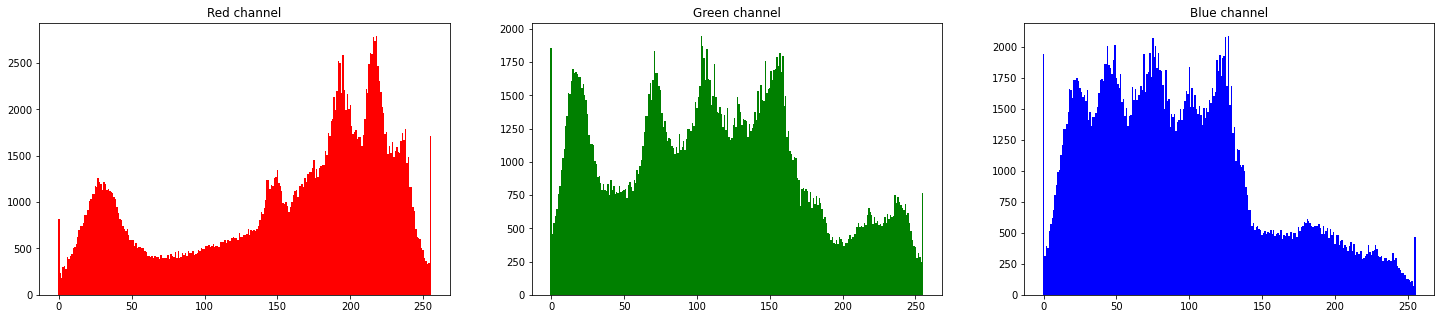

In [59]:
show_image_histogram_numpy(img1)

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

In [21]:
img2 = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/lena_lc.jpg')

In [64]:
def get_histogram(img):
  height, width, depth = img.shape
  ax = np.zeros((3, 256))
  for y in range(0, height):
    for x in range(0, width):
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1

  return ax

In [66]:
img2_histogram = get_histogram(img2)

img2_array = np.asarray(img2)

histogram_array = np.bincount(img2_array.flatten(), minlength=256)

num_px = np.sum(histogram_array)
histogram_array = histogram_array/num_px

chis_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chis_array).astype(np.uint8)

img_list = list(img2_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img2_array.shape)


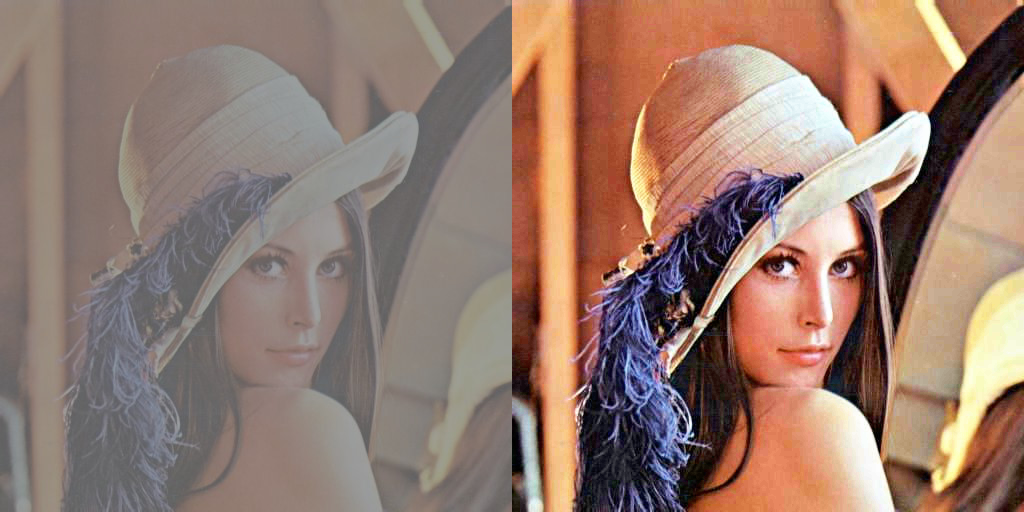

In [67]:
final_frame = cv.hconcat((img2, eq_img_array))
cv2_imshow(final_frame)

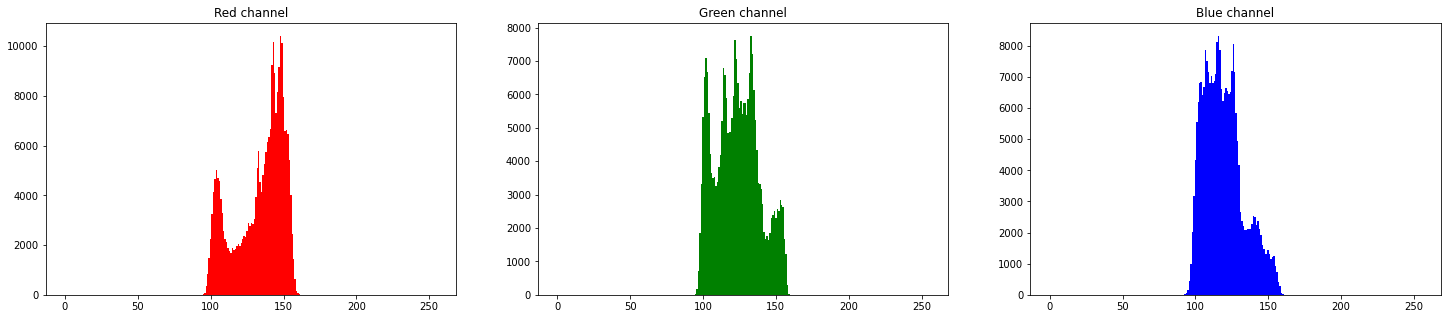

In [37]:
show_image_histogram(img2)

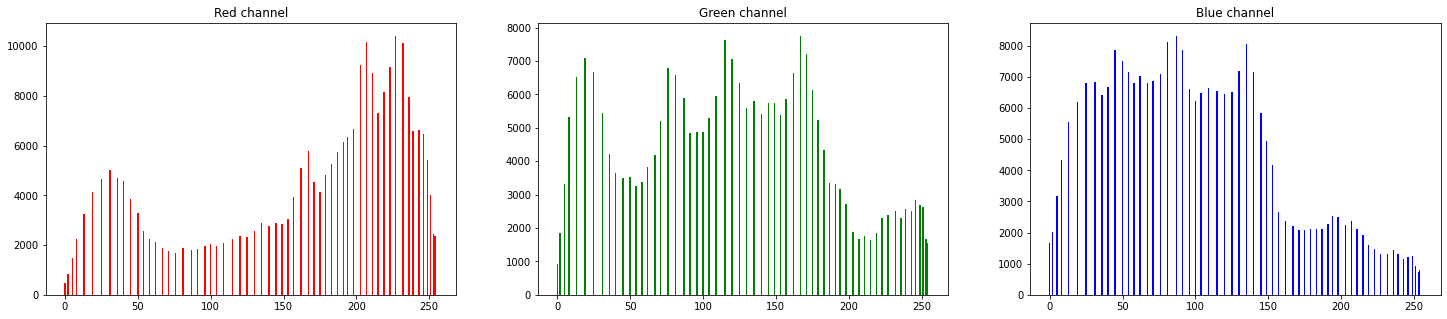

In [68]:
show_image_histogram(eq_img_array)

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

> Hasilnya berbeda, pada CV2 lebih kebiru-biruan. Sedangkan, pada fungsi yang manual, lebih mendekati ke gambar aslinya.

In [114]:
def histogram_equalization(img):
    # Konversi gambar dari BGR ke RGB
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    # Pisahkan setiap channel warna
    r, g, b = cv.split(img)

    # Lakukan histogram equalization pada setiap channel warna
    r_eq = cv.equalizeHist(r)
    g_eq = cv.equalizeHist(g)
    b_eq = cv.equalizeHist(b)

    # Gabungkan kembali setiap channel warna yang sudah diequalisasi
    img_eq = cv.merge([r_eq, g_eq, b_eq])

    # Konversi citra hasil equalization dari RGB ke BGR
    img_eq = cv.cvtColor(img_eq, cv.COLOR_RGB2BGR)

    return img_eq

In [115]:
img2_histeqed = histogram_equalization(img2)

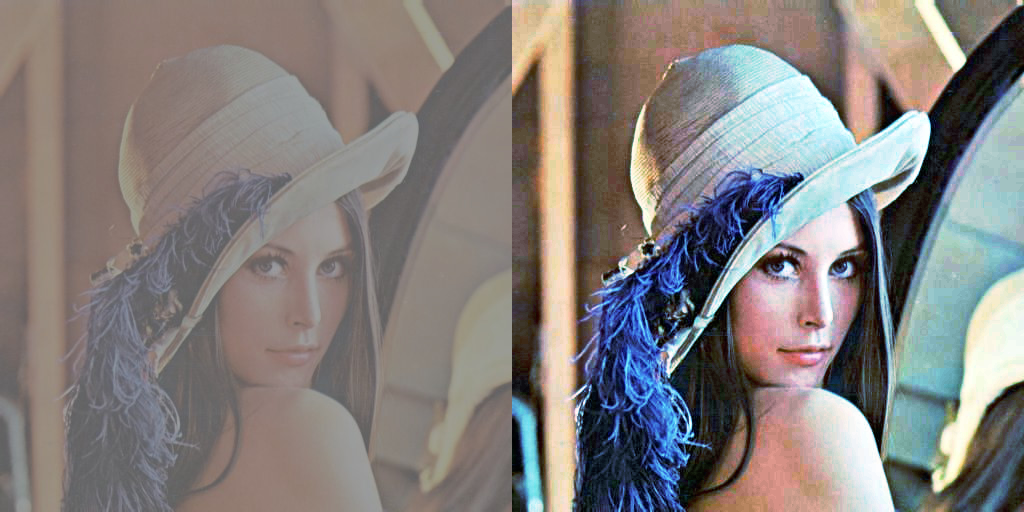

In [116]:
final_frame2 = cv.hconcat((img2, img2_histeqed))
cv2_imshow(final_frame2)

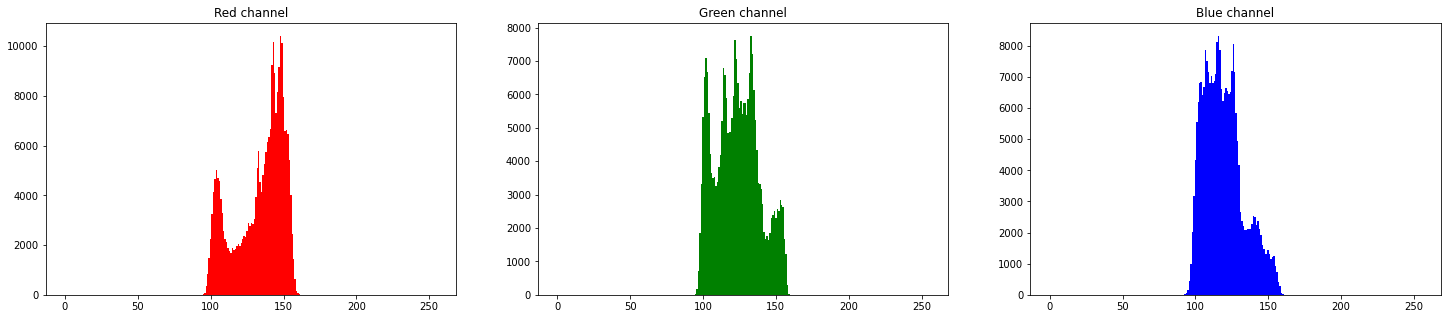

In [71]:
show_image_histogram(img2)

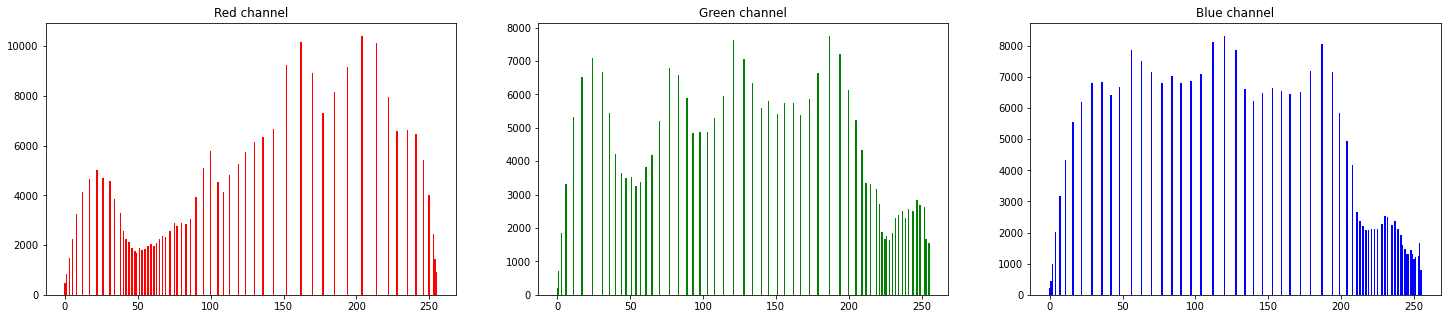

In [72]:
show_image_histogram(img2_histeqed)

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

In [95]:
 #daftar warna
colors = [(0, 0, 0), # hitam
          (0, 255, 0), # hijau
          (255, 255, 0), # kuning
          (0, 0, 255), # biru
          (0, 255, 255), # cyan
          (255, 0, 255), # magenta
          (255, 255, 255)] # putih

In [96]:
def get_closest_color(r, g, b):
    min_distance = 255*255 + 255*255 + 255*255 + 1
    p_value = 0

    for i in range(len(colors)):
      rDiff = r-colors[i][0]
      gDiff = g-colors[i][1]
      bDiff = b-colors[i][2]

      distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
      if(distance < min_distance):
        min_distance = distance
        p_value = i

    return p_value

In [97]:
img1_mapped = np.zeros(img1.shape, img1.dtype)

In [98]:
for y in range(0, img1.shape[0]):
  for x in range(0, img1.shape[1]):
    r, g, b = img1[y, x]
    new_colors = get_closest_color(r, g, b)
    img1_mapped[y, x] = colors[new_colors]

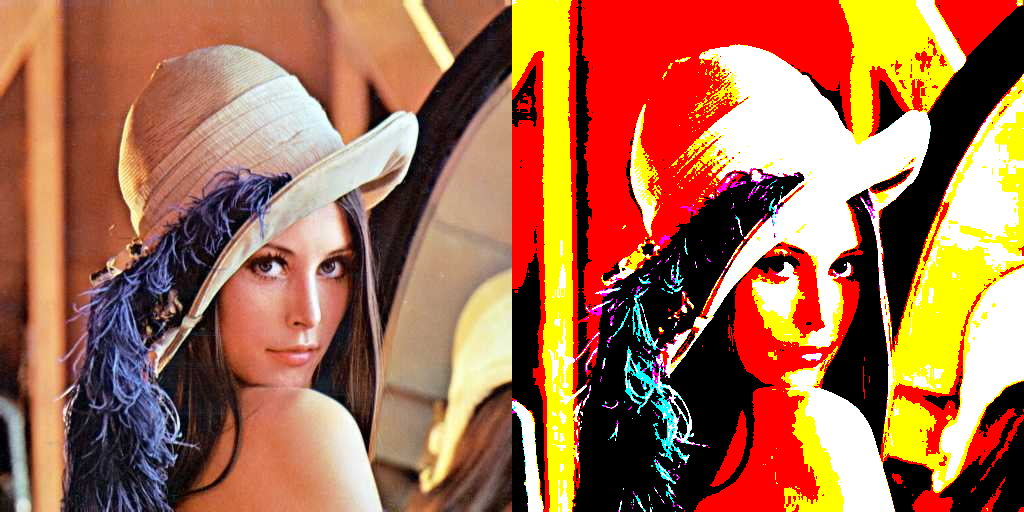

In [99]:
final_frame3 = cv.hconcat((img1, img1_mapped))
cv2_imshow(final_frame3)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

In [104]:
def dithering_floyd_steinberg(img):
    # Konversi gambar dari BGR ke RGB
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Buat array kosong untuk citra hasil dithering
    img_dither = np.zeros_like(img)

    # Lakukan error diffusion Floyd pada setiap channel warna
    for y in range(img.shape[0]-1):
        for x in range(img.shape[1]-1):
            # Channel Red
            old_val_r = img[y,x,0]
            new_val_r = 255 if old_val_r > 127 else 0
            img_dither[y,x,0] = new_val_r
            error_r = old_val_r - new_val_r

            if x < img.shape[1]-1:
                img[y,x+1,0] += error_r * 7 / 16
            if x > 0 and y < img.shape[0]-1:
                img[y+1,x-1,0] += error_r * 3 / 16
            if y < img.shape[0]-1:
                img[y+1,x,0] += error_r * 5 / 16
            if x < img.shape[1]-1 and y < img.shape[0]-1:
                img[y+1,x+1,0] += error_r * 1 / 16

            # Channel Green
            old_val_g = img[y,x,1]
            new_val_g = 255 if old_val_g > 127 else 0
            img_dither[y,x,1] = new_val_g
            error_g = old_val_g - new_val_g

            if x < img.shape[1]-1:
                img[y,x+1,1] += error_g * 7 / 16
            if x > 0 and y < img.shape[0]-1:
                img[y+1,x-1,1] += error_g * 3 / 16
            if y < img.shape[0]-1:
                img[y+1,x,1] += error_g * 5 / 16
            if x < img.shape[1]-1 and y < img.shape[0]-1:
                img[y+1,x+1,1] += error_g * 1 / 16

            # Channel Blue
            old_val_b = img[y,x,2]
            new_val_b = 255 if old_val_b > 127 else 0
            img_dither[y,x,2] = new_val_b
            error_b = old_val_b - new_val_b

            if x < img.shape[1]-1:
                img[y,x+1,2] += error_b * 7 / 16
            if x > 0 and y < img.shape[0]-1:
                img[y+1,x-1,2] += error_b * 3 / 16
            if y < img.shape[0]-1:
                img[y+1,x,2] += error_b * 5 / 16
            if x < img.shape[1]-1 and y < img.shape[0]-1:
                img[y+1,x+1,2] += error_b * 1 / 16

    img = cv.cvtColor(img, cv.COLOR_RGB2BGR)

    return img_dither

In [107]:
img1_dithered = dithering_floyd_steinberg(img1)
img1_dithered = cv.cvtColor(img1_dithered, cv.COLOR_RGB2BGR)

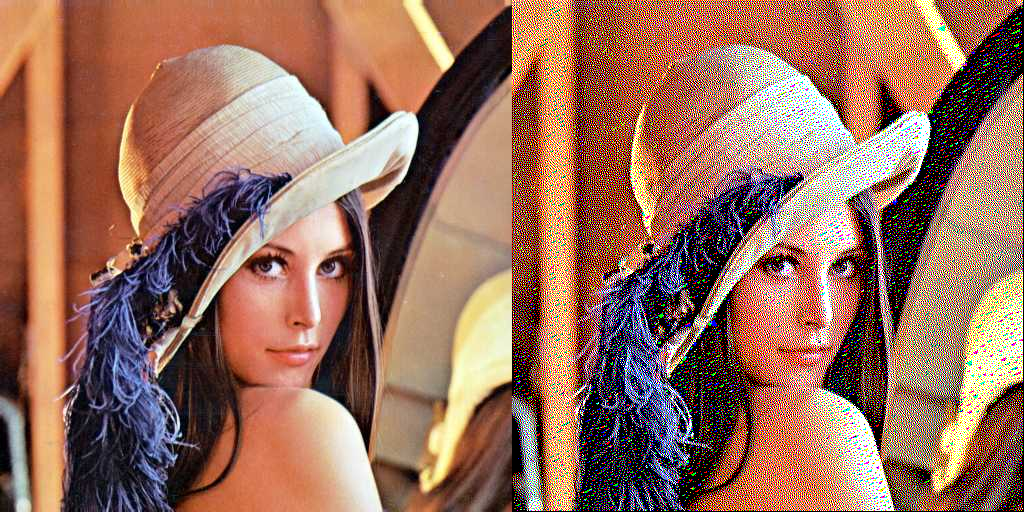

In [108]:
final_frame4 = cv.hconcat((img1, img1_dithered))
cv2_imshow(final_frame4)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

In [51]:
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img2_gray = cv.cvtColor(img2_gray, cv.COLOR_GRAY2BGR)

In [52]:
img2_gray_histeqed = histogram_equalization(img2_gray)

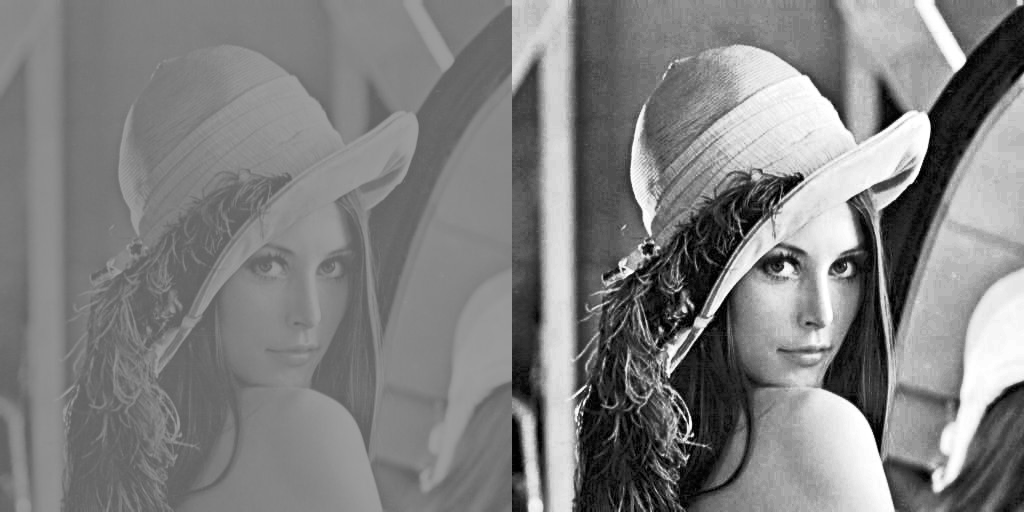

In [54]:
final_frame5 = cv.hconcat((img2_gray, img2_gray_histeqed))
cv2_imshow(final_frame5)

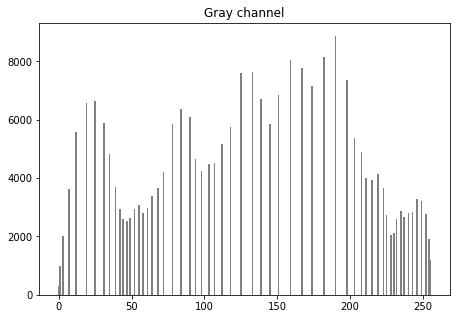

In [62]:
show_image_histogram_numpy(img2_gray_histeqed)

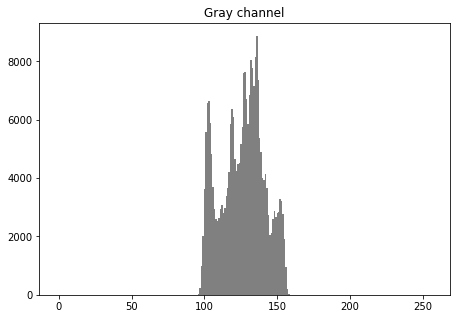

In [63]:
show_image_histogram_numpy(img2_gray)

In [109]:
img2_gray_histeqed_dithered = dithering_floyd_steinberg(img2_gray_histeqed)

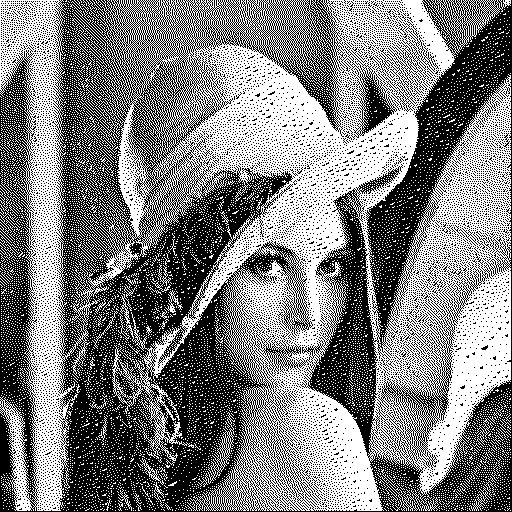

In [110]:
cv2_imshow(img2_gray_histeqed_dithered)